# Investigation of differences between BayOTA solutions and CAST

In this notebook, we'll do a single optimization run
<br>
(Lancaster, PA - minimizing Total_Cost - constrained by NPercentReduction >= 20%)
<br>
(Calvert, MD - minimizing Total_Cost - constrained by NPercentReduction >= 20%)

And then we can take the minimizer BMP portfolio, upload it to CAST and compare the BayOTA load values w/CAST load values

### Data Sources


### Changes
- 2019/03/24:

### Table of Contents

#### Standard Imports

In [1]:
import pandas as pd

import pyomo.environ as pe

from efficiencysubproblem.src.model_handling import model_generator
from efficiencysubproblem.src.solver_handling import solvehandler

from castjeeves.src.jeeves import Jeeves

In [2]:
jeeves = Jeeves()

pd.set_option('display.float_format', lambda x: '{:,.1f}'.format(x))

def numstr(number, decimalpoints: int) -> str:
    """ Add commas, and restrict decimal places """
    fmtstr = '{:,.%sf}' % str(decimalpoints)
    return fmtstr.format(number)

In [3]:
from bayota_settings.base import get_bayota_version
print(get_bayota_version())

0.1a1.dev6


#### Create Model

In [12]:
# elf._load_set_geographies(jeeves, geolist=geolist)

# geodf = jeeves.county.add_lrsegs_to_counties(countystatestrs=['District of Columbia, DC'])

# # countyids = jeeves.county.countyid_from_countystatestrs(getfrom=['District of Columbia, DC'], append=True)
# # print(countyids)
# # asdkjhg
# # strnospaces = [''.join(x.split(', ')).replace(" ", "") for x in countystatestrs]
# # countyids['countystatestrs'] = strnospaces

# # tblsubset = self.lrseg.append_lrsegs_to_counties(tablewithcountyids=countyids)

# if geodf.empty:
#     raise ValueError('** no matching geographies found. please check scale and entities **')

# geodf = jeeves.lrseg.remove_outofcbws_lrsegs(lrsegdf=geodf)
# lrsegs_list = geodf.landriversegment.tolist()

# counties_list = geodf.countyid.tolist()
# cntylrseglinkslist = list(zip(lrsegs_list, counties_list))
# print(counties_list)

[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]


In [8]:
areas = jeeves.geo.geonames_from_geotypename(geotype='County')
display(areas.head(5))
GEOAREAS = areas.loc[areas.str.match('.*DC')].tolist()
display(GEOAREAS)

geodf = jeeves.county.add_lrsegs_to_counties(countystatestrs=[x.replace('Washington, DC', 'District of Columbia, DC')
                                                              for x in GEOAREAS])
print(geodf.head(5))

0          Kent, DE
1    New Castle, DE
2        Sussex, DE
3    Washington, DC
4      Allegany, MD
Name: geographyfullname, dtype: object

['Washington, DC']

   countyid  lrsegid     landriversegment            countyname  \
0        10       64  N11001PL1_4460_4780  District of Columbia   
1        10       65  N11001PL0_4510_0001  District of Columbia   
2        10       66  N11001PL1_4780_0001  District of Columbia   
3        10       67  N11001PL2_4810_0000  District of Columbia   
4        10       68  N11001PL7_4942_0000  District of Columbia   

        countystatestrs  
0  DistrictofColumbiaDC  
1  DistrictofColumbiaDC  
2  DistrictofColumbiaDC  
3  DistrictofColumbiaDC  
4  DistrictofColumbiaDC  


In [13]:
from efficiencysubproblem.src.data_handling.interface import DataHandlerCounty

dh = DataHandlerCounty(baseloadingfilename='2010NoActionLoads.csv',
                       geolist=['District of Columbia, DC'])

DEBUG:efficiencysubproblem.src.data_handling.datahandler_base:{'self': <efficiencysubproblem.src.data_handling.interface.DataHandlerCounty object at 0x15938a3ac8>, 'save2file': True, 'geolist': ['District of Columbia, DC'], 'baseloadingfilename': '2010NoActionLoads.csv'}
DEBUG:efficiencysubproblem.src.data_handling.dataloader_geography_mixins:loading county geoentities
INFO:efficiencysubproblem.src.data_handling.datahandler_base:LRsegs loaded: ['N11001PL1_4460_4780', 'N11001PL0_4510_0001', 'N11001PL1_4780_0001', 'N11001PL2_4810_0000', 'N11001PL7_4942_0000', 'N11001PL2_4945_0000', 'N11001PL7_4960_0000', 'N11001PL7_4940_0000', 'N11001PL7_4941_0000', 'N11001PL7_4910_0000', 'N11001PM7_4820_0001', 'N11001PL2_4811_0000']


In [14]:
model_spec_file = '/Users/Danny/Desktop/CATEGORIES/CAREER_MANAGEMENT/CRC_ResearchScientist_Optimization/Optimization_Tool/2_ExperimentFolder/bayota/bin/specification_files/model_specs/costmin_total_Npercentreduction.yaml'
# model_spec_file = '/Users/Danny/Desktop/CATEGORIES/CAREER_MANAGEMENT/CRC_ResearchScientist_Optimization/Optimization_Tool/2_ExperimentFolder/bayota/bin/specification_files/model_specs/Nloadreductionmax_totalcostupper.yaml'
mdlhandler = model_generator.ModelHandlerBase(model_spec_file=model_spec_file,
                                              geoscale='county',
                                              geoentities='District of Columbia, DC',
                                              savedata2file=False,
                                              baseloadingfilename='2010NoActionLoads.csv',
                                              log_level='DEBUG')

mdl = mdlhandler.model

DEBUG:efficiencysubproblem.src.data_handling.datahandler_base:{'self': <efficiencysubproblem.src.data_handling.interface.DataHandlerCounty object at 0x1544537e48>, 'save2file': False, 'geolist': ['District of Columbia, DC'], 'baseloadingfilename': '2010NoActionLoads.csv'}
DEBUG:efficiencysubproblem.src.data_handling.dataloader_geography_mixins:loading county geoentities
INFO:efficiencysubproblem.src.data_handling.datahandler_base:LRsegs loaded: ['N11001PL1_4460_4780', 'N11001PL0_4510_0001', 'N11001PL1_4780_0001', 'N11001PL2_4810_0000', 'N11001PL7_4942_0000', 'N11001PL2_4945_0000', 'N11001PL7_4960_0000', 'N11001PL7_4940_0000', 'N11001PL7_4941_0000', 'N11001PL7_4910_0000', 'N11001PM7_4820_0001', 'N11001PL2_4811_0000']
DEBUG:costmin_total_Npercentreduction:Loading county geoentities
INFO:costmin_total_Npercentreduction:Loading objective {name="Total_Cost"} into the model object 
INFO:costmin_total_Npercentreduction:no objective indices to deactivate
INFO:costmin_total_Npercentreduction:Lo

In [5]:
# import math
# for p in mdl.PLTNTS:
#     if math.isinf(pe.value(mdl.original_load_expr[p])):
#         print(f"Uh oh! original_load_expr for {p} is Inf")
#     elif math.isnan(pe.value(mdl.original_load_expr[p])):
#         print(f"Uh oh! original_load_expr for {p} is NaN")
#     else:
#         print("original_load_expr for %s is %s" % (p, numstr(pe.value(mdl.original_load_expr[p]), 2)))

original_load_expr for N is 2,606,518.77
original_load_expr for P is 45,401.14
original_load_expr for S is 38,055,813.02


In [10]:
# d = []
# for k, v in mdl.original_load_for_each_loadsource_expr.items():
#     if math.isinf(pe.value(v)) | math.isnan(pe.value(v)):
#         d.append({'pollutant': k[0],
#                   'loadsourceshortname': k[1],
#                   'v': pe.value(v)})
        
# df = pd.DataFrame(d)
# if df.empty:
#     print("no Inf's or NaN's")
# else:
#     display(df.head(5))
#     df = df.sort_values('loadsourceshortname', ascending=True).reset_index()
#     df['loadsource'] = jeeves.loadsource.fullnames_from_shortnames(df['loadsourceshortname'], use_order_of_sourcetbl=False)
#     display(df.head(100))

no Inf's or NaN's


In [15]:
p = 'N'
lmbda = 'fnp'

print("original load for '%s': %s" % (lmbda, pe.value(mdl.original_load_for_each_loadsource_expr[p, lmbda])))

[(l, lmbda, pe.value(mdl.phi[l, lmbda, p])) for l in mdl.LRSEGS]

original load for 'fnp': 0.0


[('N11001PL2_4945_0000', 'fnp', 0.0),
 ('N11001PM7_4820_0001', 'fnp', 0.0),
 ('N11001PL0_4510_0001', 'fnp', 0.0),
 ('N11001PL2_4810_0000', 'fnp', 0.0),
 ('N11001PL1_4460_4780', 'fnp', 0.0),
 ('N11001PL1_4780_0001', 'fnp', 0.0),
 ('N11001PL7_4940_0000', 'fnp', 0.0),
 ('N11001PL7_4960_0000', 'fnp', 0.0),
 ('N11001PL7_4910_0000', 'fnp', 0.0),
 ('N11001PL7_4941_0000', 'fnp', 0.0),
 ('N11001PL2_4811_0000', 'fnp', 0.0),
 ('N11001PL7_4942_0000', 'fnp', 0.0)]

In [30]:
# p = 'N'
# lmbda = 'fnp'
# l = 'N42099SL2_2540_2370'

# print(pe.value(mdl.T[l, lmbda]))
# print(pe.value(mdl.phi[l, lmbda, p]))

# print((mdl.phi[l, lmbda, p] * mdl.T[l, lmbda]))

In [4]:
# import cloudpickle as cp
# mdobj = cp.load('/Users/Danny/bayota_ws_0.1a1.dev6/temp/source_pickles/MetaData.obj')

In [31]:
mdl.LRSEGS.pprint()

LRSEGS : Dim=0, Dimen=1, Size=19, Domain=None, Ordered=False, Bounds=None
    ['N24009WL0_4772_0000', 'N24009WL0_4920_0000', 'N24009WL0_4921_0000', 'N24009WL0_4922_0000', 'N24009WL0_4923_0000', 'N24009WL0_4925_0000', 'N24009XL0_4954_0000', 'N24009XL0_5320_0001', 'N24009XL0_5341_0000', 'N24009XL0_5342_0000', 'N24009XL0_5343_0000', 'N24009XL0_5345_0000', 'N24009XL0_5346_0000', 'N24009XL0_5348_0000', 'N24009XL0_5350_0000', 'N24009XL3_4713_0000', 'N24009XL3_4950_0000', 'N24009XL3_4951_0000', 'N24009XL3_4952_0000']


In [16]:
# mdl.totalcostupperbound = 1000000
mdl.percent_reduction_minimum['N'] = 20

In [17]:
pe.value(mdl.percent_reduction_minimum['N'])

20

#### Solve Model

In [18]:
solution_dict = solvehandler.basic_solve(modelhandler=mdlhandler, mdl=mdlhandler.model,
                                         translate_to_cast_format='True')

DEBUG:efficiencysubproblem.src.solver_handling.solvehandler:Solver_Path====/Users/Danny/Desktop/CATEGORIES/CAREER_MANAGEMENT/CRC_ResearchScientist_Optimization/Optimization_Tool/2_ExperimentFolder/ampl/amplide.macosx64/ipopt.opt


Ipopt 3.12.8: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

This is Ipopt version 3.12.8, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:    23852
Number of nonzeros in Lagrangian Hessian.............:    22538

Total number of variables............................:    16068
                     variables with only lower bounds:    16068
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total



INFO:efficiencysubproblem.src.solver_handling.solvehandler:*solving done* <- it took 4.856342 seconds>
DEBUG:efficiencysubproblem.src.solver_handling.solvehandler:solution is optimal and feasible


   stateid
0        1
1        1
2        1
3        1
4        1


In [8]:
# from bayota_util.infeasible import log_active_constraints, log_close_to_bounds, log_infeasible_bounds, log_infeasible_constraints

In [19]:
# log_infeasible_constraints(mdl)
# log_infeasible_bounds(mdl)

In [19]:
pe.value(mdl.Total_Cost)

2059138.0041354522

In [13]:
pe.value(mdl.T['N42099SL4_2370_2330', 'swm'])

0.022997284308075905

In [13]:
# from pyomo.core import Constraint, Var, value, TraversalStrategy
# from math import fabs

# tol=1E-10

# for constr in mdl.component_data_objects(
#         ctype=Constraint, active=True, descend_into=True):
#     # if constraint is an equality, handle differently
#     if constr.equality and fabs(value(constr.lower - constr.body)) >= tol:
#         print('CONSTR {}: {} != {}'.format(
#             constr.name, value(constr.body), value(constr.lower)))
#         continue
#     # otherwise, check LB and UB, if they exist
#     if constr.has_lb() and value(constr.lower - constr.body) >= tol:
#         print('CONSTR {}: {} < {}'.format(
#             constr.name, value(constr.body), value(constr.lower)))
#     if constr.has_ub() and value(constr.body - constr.upper) >= tol:
#         print('CONSTR {}: {} > {}'.format(
#             constr.name, value(constr.body), value(constr.upper)))

In [14]:
print(f"solving timestamp: {solution_dict['timestamp']}      feasible: {solution_dict['feasible']}")

solving timestamp: 20190331_113710      feasible: True


In [15]:
solution_dict.keys()

dict_keys(['output_file_name', 'solution_df', 'cast_formatted_df', 'timestamp', 'feasible', 'solved_results', 'model_object'])

In [16]:
df = solution_dict['solution_df']
df.head()

,acres,bmpshortname,landriversegment,loadsource,totalannualizedcostperunit,totalinstancecost,bmpfullname,original_load_N,original_load_P,original_load_S,new_load_N,new_load_P,new_load_S
0,475.4,ConPlan,N42099SL8_2080_2050,pas,1.9,922.3,Soil Conservation and Water Quality Plans,"2,606,518.8","45,401.1","38,055,813.0","2,085,215.0","29,564.5","18,573,809.2"
1,"2,132.1",ConPlan,N42099SJ2_2150_2130,pas,1.9,"4,136.3",Soil Conservation and Water Quality Plans,"2,606,518.8","45,401.1","38,055,813.0","2,085,215.0","29,564.5","18,573,809.2"
2,"5,804.0",ConPlan,N42099SL3_2290_2260,pas,1.9,"11,259.8",Soil Conservation and Water Quality Plans,"2,606,518.8","45,401.1","38,055,813.0","2,085,215.0","29,564.5","18,573,809.2"
3,"1,072.8",ConPlan,N42099SJ6_1970_2130,pas,1.9,"2,081.3",Soil Conservation and Water Quality Plans,"2,606,518.8","45,401.1","38,055,813.0","2,085,215.0","29,564.5","18,573,809.2"
4,26.0,ConPlan,N42099SL8_1880_2030,pas,1.9,50.4,Soil Conservation and Water Quality Plans,"2,606,518.8","45,401.1","38,055,813.0","2,085,215.0","29,564.5","18,573,809.2"


,bmpshortname,acres,totalannualizedcostperunit,totalinstancecost,original_load_N,original_load_P,original_load_S,new_load_N,new_load_P,new_load_S
0,AgStormEff,116.4,"22,941.1","190,813.3","36,491,262.8","635,615.9","532,781,382.3","29,193,010.5","413,902.9","260,033,328.3"
1,BarnRunoffCont,116.4,"7,831.6","65,139.6","36,491,262.8","635,615.9","532,781,382.3","29,193,010.5","413,902.9","260,033,328.3"
2,ConPlan,"9,633.7",11.6,"18,689.5","15,639,112.6","272,406.8","228,334,878.1","12,511,290.2","177,387.0","111,442,855.0"
3,ConserveTill,"1,424.0",0.0,0.0,"52,130,375.4","908,022.7","761,116,260.4","41,704,300.6","591,289.9","371,476,183.2"
4,CoverCropTradRED,"8,456.4","1,172.0","582,972.3","44,310,819.1","771,819.3","646,948,821.3","35,448,655.5","502,596.4","315,754,755.8"


DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


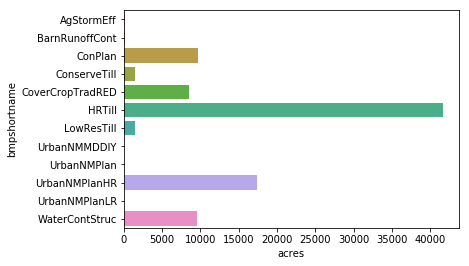

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
df_summed = df.groupby(['bmpshortname']).sum().reset_index()
display(df_summed.head())
sns.barplot(x='acres', y='bmpshortname', data=df_summed.loc[:, ['bmpshortname', 'acres']], )
plt.show()

## Deduce the differences

In [20]:
mdl.LRSEGS.pprint()

LRSEGS : Dim=0, Dimen=1, Size=13, Domain=None, Ordered=False, Bounds=None
    ['N42099PU3_2510_3290', 'N42099SJ2_2150_2130', 'N42099SJ3_2160_2170', 'N42099SJ6_1970_2130', 'N42099SJ6_2130_2050', 'N42099SL2_2540_2370', 'N42099SL3_2260_2050', 'N42099SL3_2290_2260', 'N42099SL4_2370_2330', 'N42099SL8_1880_2030', 'N42099SL8_2030_2080', 'N42099SL8_2080_2050', 'N42099SL9_2050_2270']


In [21]:
pe.value(mdl.T['N42099SL4_2370_2330', 'dbl'])

0.023072730749845505

In [22]:
# Total Acres Available for each Load Source
d = []
for k, v in mdl.T.items():
    d.append({'lrseg': k[0],
              'loadsourceshortname': k[1],
              'v': v})

df = pd.DataFrame(d)
df = df.groupby('loadsourceshortname').sum().reset_index()
df['loadsource'] = jeeves.loadsource.fullnames_from_shortnames(df, use_order_of_sourcetbl=False)

display(df.head(100))

,loadsourceshortname,v,loadsource
0,aop,"4,502.1",Ag Open Space
1,cch,161.2,CSS Tree Canopy over Turf Grass
2,cci,37.2,CSS Tree Canopy over Impervious
3,ccn,2.7,CSS Construction
4,cfr,150.5,CSS Forest
5,cir,43.4,CSS Roads
6,cmo,15.6,CSS Mixed Open
7,cnr,260.0,CSS Buildings and Other
8,ctg,192.4,CSS Turf Grass
9,dbl,"4,777.4",Double Cropped Land


In [23]:
# Confirm the correct load values
print(numstr(pe.value(mdl.percent_reduction_expr['N']), 3))

20.000


In [26]:
def phi_for_each_loadsource(mdl) -> pe.ConcreteModel:
    def phi_for_each_loadsource_rule(model, p, lmbda):
        return sum([(model.phi[l, lmbda, p] * model.T[l, lmbda])
                    for l in model.LRSEGS])

    mdl.original_load_for_each_loadsource_expr = pe.Expression(mdl.PLTNTS, mdl.LOADSRCS, rule=phi_for_each_loadsource_rule)
    return mdl

d = []
for k, v in mdl.phi.items():
    if k[0] == 'N42099SL2_2540_2370':
        if k[2] == 'N':
            d.append({'loadsourceshortname': k[1],
                      'v': pe.value(v)})

df = pd.DataFrame(d).sort_values('loadsourceshortname', ascending=True).reset_index()
df['loadsource'] = jeeves.loadsource.fullnames_from_shortnames(df['loadsourceshortname'], use_order_of_sourcetbl=False)
display(df.head(100))

,index,loadsourceshortname,v,loadsource
0,0,aop,0.0,Ag Open Space
1,1,cch,0.0,CSS Tree Canopy over Turf Grass
2,2,cci,0.0,CSS Tree Canopy over Impervious
3,3,ccn,0.0,CSS Construction
4,4,cfr,0.0,CSS Forest
5,5,cir,0.0,CSS Roads
6,6,cmo,0.0,CSS Mixed Open
7,7,cnr,0.0,CSS Buildings and Other
8,8,ctg,0.0,CSS Turf Grass
9,9,dbl,17.0,Double Cropped Land


In [24]:
d = []
for k, v in mdl.original_load_for_each_loadsource_expr.items():
    if k[0] == 'N':
        d.append({'loadsourceshortname': k[1],
                  'v': pe.value(v)})

df = pd.DataFrame(d).sort_values('loadsourceshortname', ascending=True).reset_index()
df['loadsource'] = jeeves.loadsource.fullnames_from_shortnames(df['loadsourceshortname'], use_order_of_sourcetbl=False)
display(df.head(100))

,index,loadsourceshortname,v,loadsource
0,5,aop,"15,008.1",Ag Open Space
1,16,cch,0.0,CSS Tree Canopy over Turf Grass
2,18,cci,0.0,CSS Tree Canopy over Impervious
3,4,ccn,0.0,CSS Construction
4,29,cfr,0.0,CSS Forest
5,39,cir,0.0,CSS Roads
6,23,cmo,0.0,CSS Mixed Open
7,38,cnr,0.0,CSS Buildings and Other
8,8,ctg,0.0,CSS Turf Grass
9,0,dbl,"121,352.5",Double Cropped Land


In [15]:
d = []
for k, v in mdl.new_load_for_each_loadsource_expr.items():
    if k[0] == 'N':
        d.append({'loadsourceshortname': k[1],
                  'v': pe.value(v)})

df = pd.DataFrame(d).sort_values('loadsourceshortname', ascending=True).reset_index()
df['loadsource'] = jeeves.loadsource.fullnames_from_shortnames(df['loadsourceshortname'], use_order_of_sourcetbl=False)
display(df.head(10))

,index,loadsourceshortname,v,loadsource
0,17,aop,"7,752.8",Ag Open Space
1,34,cch,0.0,CSS Tree Canopy over Turf Grass
2,22,cci,0.0,CSS Tree Canopy over Impervious
3,1,ccn,0.0,CSS Construction
4,6,cfr,0.0,CSS Forest
5,11,cir,0.0,CSS Roads
6,38,cmo,0.0,CSS Mixed Open
7,26,cnr,0.0,CSS Buildings and Other
8,28,ctg,0.0,CSS Turf Grass
9,18,dbl,"904,159.7",Double Cropped Land


In [23]:
pe.value(mdl.new_load_for_each_loadsource_expr['N', 'mci'])

8164.160180899246

In [16]:
pe.value(mdl.Total_Cost)

1318179.5086289498